Name: Shahnwaz Khan
Roll: AC-1272
Program: Decision Tree Classifier

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn import tree

In [1]:
# df=pd.read_csv('C:/Users/91914/OneDrive/Documents/6th_Semester/ML/Data.csv')
import seaborn as sns
df=sns.load_dataset('iris')
display(df.head())

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
# Preprocessing: Fill missing values
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
# store the feature matrix (X) and response vector (y)
X = df.drop(columns='species')
y = df['species']
# splitting X and y into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
x_train

,sepal_length,sepal_width,petal_length,petal_width
98,5.1,2.5,3.0,1.1
136,6.3,3.4,5.6,2.4
105,7.6,3.0,6.6,2.1
97,6.2,2.9,4.3,1.3
101,5.8,2.7,5.1,1.9
...,...,...,...,...
39,5.1,3.4,1.5,0.2
12,4.8,3.0,1.4,0.1
123,6.3,2.7,4.9,1.8
30,4.8,3.1,1.6,0.2


In [8]:
y_train

98     versicolor
136     virginica
105     virginica
97     versicolor
101     virginica
          ...    
39         setosa
12         setosa
123     virginica
30         setosa
112     virginica
Name: species, Length: 120, dtype: object

In [9]:
DC=DecisionTreeClassifier()

In [10]:
DC.fit(x_train,y_train)

DecisionTreeClassifier()

In [11]:
y_pred=DC.predict(x_test)

In [12]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.85      0.92        13
   virginica       0.75      1.00      0.86         6

    accuracy                           0.93        30
   macro avg       0.92      0.95      0.92        30
weighted avg       0.95      0.93      0.94        30



In [13]:
# Confusion metrics
from sklearn.metrics import confusion_matrix, accuracy_score
cm=confusion_matrix(y_test,y_pred)
# print(precision_score(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(cm)

0.9333333333333333
[[11  0  0]
 [ 0 11  2]
 [ 0  0  6]]


In [17]:
features=df.columns[:4].tolist()
features

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

[Text(167.4, 195.696, 'petal_width <= 0.7\ngini = 0.665\nsamples = 120\nvalue = [39, 37, 44]'),
 Text(125.55000000000001, 152.208, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(209.25, 152.208, 'petal_width <= 1.75\ngini = 0.496\nsamples = 81\nvalue = [0, 37, 44]'),
 Text(167.4, 108.72, 'petal_length <= 4.95\ngini = 0.176\nsamples = 41\nvalue = [0, 37, 4]'),
 Text(83.7, 65.232, 'petal_width <= 1.65\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(41.85, 21.744, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(125.55000000000001, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(251.10000000000002, 65.232, 'petal_width <= 1.65\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(209.25, 21.744, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(292.95, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(251.10000000000002, 108.72, 'gini = 0.0\nsamples = 40\nvalue = [0, 0, 40]')]

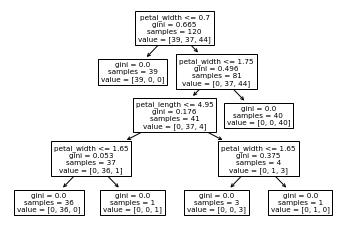

In [18]:
tree.plot_tree(DC,feature_names=features)